# Initial processing

In [24]:
import csv

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_avgs.ln.surrogate_variables_corrected.ncrna.txt",
            "../data/GeneExpressionData/featurecounts.genes.TPM.selected_avgs.ln.surrogate_variables_corrected.protein_coding.txt",
            "../data/GeneExpressionData/featurecounts.genes.TPM.selected_avgs.txt",
            "../data/GeneExpressionData/featurecounts.genes.counts.selected_avgs.ln.surrogate_variables_corrected.ncrna.txt"]
outfilenames = [filename.replace("avgs", "avgs") for filename in filenames]
geneTSs = []

for filename in filenames:
    geneTSs.append(pd.read_csv(filename, sep="\t"))

# for filename in filenames:
#     with open(filename, 'rU') as csvfile:
#         reader = csv.DictReader(csvfile, delimiter='\t')
#         geneTS = []
#         for row in reader:
#             newrow = row[:]
            
#             geneTS.append(row)
#         geneTSs.append(geneTS)

In [25]:
for geneTS in geneTSs:
    #print geneTS.head()
    print geneTS

                    gene  t00_rep1  t00_rep2plusextra  t00_rep3plusextra  \
0      ENSG00000243485.3  0.001897           0.000473          -0.001715   
1      ENSG00000237613.2  0.005220          -0.001143           0.000985   
2      ENSG00000238009.5  0.000199          -0.002337           0.001801   
3      ENSG00000228463.7  0.151741           0.236145           0.076761   
4     ENSG00000237094.10  0.100990           0.127229           0.115085   
5      ENSG00000231709.1 -0.000470           0.005665           0.004782   
6      ENSG00000239664.2 -0.005989          -0.000843          -0.007494   
7      ENSG00000230021.6  0.004169           0.122775          -0.002908   
8      ENSG00000235373.1  0.043702           0.040143           0.029425   
9      ENSG00000240618.1  0.535618           0.032517           0.463013   
10     ENSG00000228327.2  0.209602           0.572711           0.666851   
11     ENSG00000237491.7  0.174209           0.235226           0.258687   
12     ENSG0

In [26]:
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]

# average all the data and show confidence intervals

In [27]:


for geneTS in geneTSs:
    for key in keys:
        cols = [col for col in list(geneTS.columns.values) if col[:len(key)] == key]
        geneTS[key] = sum([geneTS[col] for col in cols]) * 1.0 / len(cols)
    
            

In [28]:
geneTS.head()

,gene,t00_rep1,t00_rep2plusextra,t00_rep3plusextra,t00_rep4,t05_rep1,t05_rep2,t05_rep3,t05_rep4,t1_rep1,...,t1_,t2_,t3_,t4_,t5_,t6_,t7_,t8_,t10_,t12_
0,ENSG00000243485.3,-0.016434,-0.091397,-0.095094,-0.078450,0.001591,-0.027836,-0.071389,0.021533,0.054103,...,0.027496,0.022270,0.022916,0.014771,0.029333,0.248109,-0.005613,-0.007604,-0.000443,-0.019219
1,ENSG00000237613.2,-0.005193,-0.028787,-0.026548,-0.007347,0.008981,-0.013173,-0.025417,0.023711,0.011939,...,0.010133,0.007884,0.010967,0.006104,0.012195,0.004800,-0.004601,0.165776,-0.005344,-0.011935
2,ENSG00000238009.5,-0.012423,-0.070536,-0.125858,0.364892,-0.129518,0.046446,-0.009882,0.448738,0.120410,...,0.171797,0.003774,-0.040124,-0.010989,-0.022934,0.022011,0.039347,0.246301,0.079912,0.249144
3,ENSG00000228463.7,1.498430,1.865733,0.899848,1.437563,1.457313,1.282356,0.671321,1.206940,1.157671,...,1.400432,1.504317,1.656106,1.480868,1.252674,1.491377,1.398752,1.416933,0.891504,1.855568
4,ENSG00000237094.10,1.270158,1.431684,1.050288,1.045425,1.452474,1.681888,0.938522,1.762634,0.484655,...,0.998702,0.660435,0.709247,0.625182,1.282985,0.594390,1.258876,0.842129,0.374781,0.428427


In [31]:
for outfilename, geneTS in zip(outfilenames, geneTSs):
    geneTS.to_csv(outfilename, sep='\t', index=False, columns = ["gene"] + keys)

Next, let's get some:
 * box plots over time of the average gene and stdv
 * plot some individual trajectories
 * apply some granger causalities? (use pairwise first to find most similar genes, then do conditional)

In [129]:
import pandas as pd
import numpy as np
%matplotlib inline
filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_avgs.ln.surrogate_variables_corrected.protein_coding.txt",
            "../data/GeneExpressionData/featurecounts.genes.TPM.selected_avgs.ln.surrogate_variables_corrected.ncrna.txt",
            "../data/GeneExpressionData/featurecounts.genes.TPM.selected_avgs.txt",
            "../data/GeneExpressionData/featurecounts.genes.counts.selected_avgs.ln.surrogate_variables_corrected.ncrna.txt"]
names = ["Protein-Coding_TPM", "NCRNA_TPM", "Average_TPM", 'NCRNA_counts']
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]

geneTSs = []
for filename in filenames:
    geneTSs.append(pd.read_csv(filename, sep="\t"))

In [130]:
for geneTS in geneTSs:
    geneTS = geneTS.transpose()
    geneTS.columns = geneTS.iloc[0]
    geneTS = geneTS.drop(['gene'])
    print geneTS.head()

gene ENSG00000279928.1 ENSG00000279457.2 ENSG00000187634.9 ENSG00000188976.9  \
t00          0.4948424         0.9504298          3.544287          3.732314   
t05          0.5371428         0.8522591          3.559118          3.727517   
t1_           0.625065         0.7766687          3.106242          3.710055   
t2_          0.5930141         0.8776751          3.142258          3.744803   
t3_          0.3386597         0.8781014          3.036939          3.750912   

gene ENSG00000187961.12 ENSG00000187583.9 ENSG00000187642.8 ENSG00000188290.9  \
t00            2.399058          1.470402        0.07437696          2.580221   
t05             2.25779          1.498249        0.09903834          2.722691   
t1_            2.113061          1.478212        0.02531336          2.448082   
t2_            2.181043          1.405952         0.1195115            2.4182   
t3_            2.081145          1.145547        0.04143373          2.424241   

gene ENSG00000187608.7 ENSG00000

For name Protein-Coding_TPM
(17692, 13)
                 gene       t00       t05       t1_       t2_       t3_  \
0   ENSG00000279928.1  0.494842  0.537143  0.625065  0.593014  0.338660   
1   ENSG00000279457.2  0.950430  0.852259  0.776669  0.877675  0.878101   
2   ENSG00000187634.9  3.544287  3.559118  3.106242  3.142258  3.036939   
3   ENSG00000188976.9  3.732314  3.727517  3.710055  3.744803  3.750912   
4  ENSG00000187961.12  2.399058  2.257790  2.113061  2.181043  2.081145   

        t4_       t5_       t6_       t7_       t8_      t10_      t12_  
0  0.342844  0.329433  0.612775  0.465733  0.525277  0.536561  0.352902  
1  0.707519  0.740215  0.934854  0.963172  1.004151  0.770368  0.980118  
2  2.963774  2.939541  3.092968  3.243686  3.318156  3.150481  3.149309  
3  3.694517  3.694041  3.678787  3.704833  3.731956  3.737911  3.721162  
4  2.052945  1.943786  2.033550  2.202139  2.302568  2.080218  2.086235  
Averages over time points:  t00     2.192417
t05     2.206402
t1_

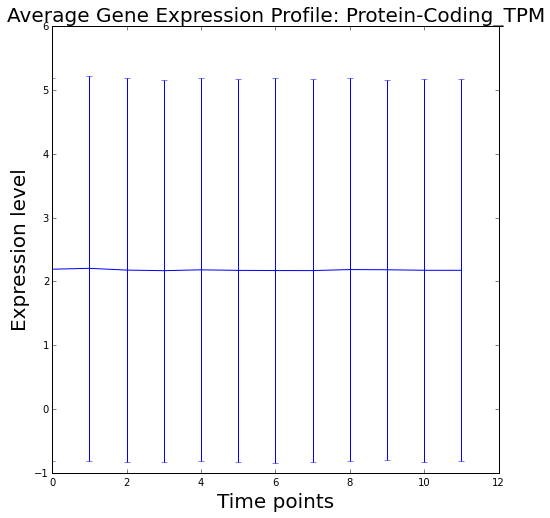

Standard deviations over time points;  t00     1.826552
t05     1.835373
t1_     1.832324
t2_     1.819849
t3_     1.827020
t4_     1.824374
t5_     1.832141
t6_     1.827123
t7_     1.822033
t8_     1.813521
t10_    1.823319
t12_    1.821105
dtype: float64
For name NCRNA_TPM
(8141, 13)
                 gene       t00       t05       t1_       t2_       t3_  \
0   ENSG00000243485.3  0.000466 -0.000710  0.001036  0.002446 -0.000593   
1   ENSG00000237613.2  0.001944  0.001253 -0.000280  0.000704 -0.002513   
2   ENSG00000238009.5  0.004336  0.010700  0.008688 -0.002444  0.001091   
3   ENSG00000228463.7  0.154250  0.103241  0.132005  0.167655  0.210110   
4  ENSG00000237094.10  0.107607  0.148978  0.081421  0.006955  0.029222   

        t4_       t5_       t6_       t7_       t8_      t10_      t12_  
0  0.000287 -0.001110  0.047217 -0.000168 -0.000043  0.000595 -0.000913  
1 -0.001732 -0.006850 -0.007547  0.001417  0.036537  0.003223  0.002965  
2 -0.000022  0.001504  0.000854  0.0005

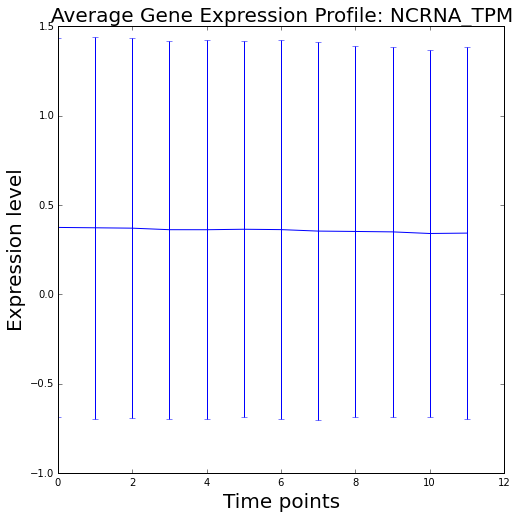

Standard deviations over time points;  t00     0.646110
t05     0.649867
t1_     0.646704
t2_     0.643174
t3_     0.645214
t4_     0.640396
t5_     0.645585
t6_     0.644294
t7_     0.631352
t8_     0.629513
t10_    0.623939
t12_    0.632816
dtype: float64
For name Average_TPM
(60483, 13)
                gene       t00       t05       t1_       t2_       t3_  \
0  ENSG00000223972.5  0.328000  0.168482  0.151703  0.146495  0.054762   
1  ENSG00000227232.5  0.201573  0.489472  0.526612  0.417447  0.217852   
2  ENSG00000278267.1  0.000000  0.440234  0.000000  0.751065  0.000000   
3  ENSG00000243485.3  0.000000  0.000000  0.000000  0.000000  0.000000   
4  ENSG00000274890.1  0.000000  0.000000  0.000000  0.000000  0.000000   

        t4_       t5_       t6_       t7_       t8_      t10_      t12_  
0  0.123968  0.092178  0.124795  0.142430  0.108370  0.155451  0.316184  
1  0.267492  0.270058  0.174975  0.413998  0.236648  0.325717  0.306123  
2  0.000000  0.000000  1.595922  0.000000 

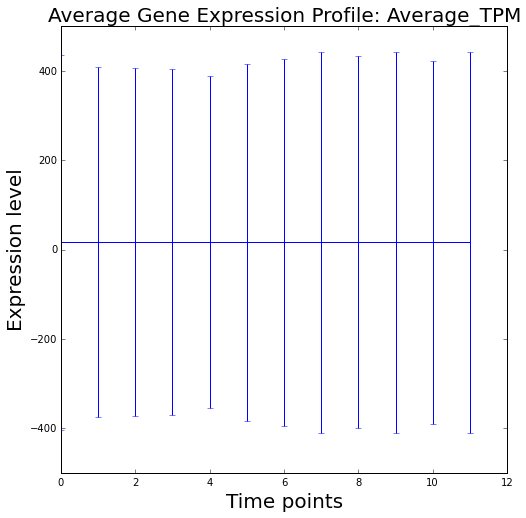

Standard deviations over time points;  t00     255.056326
t05     238.146651
t1_     236.787589
t2_     235.965196
t3_     225.823822
t4_     243.153127
t5_     250.109238
t6_     259.424664
t7_     253.522083
t8_     259.209770
t10_    247.377370
t12_    259.216466
dtype: float64
For name NCRNA_counts
(8141, 13)
                 gene       t00       t05       t1_       t2_       t3_  \
0   ENSG00000243485.3 -0.070344 -0.019025  0.027496  0.022270  0.022916   
1   ENSG00000237613.2 -0.016969 -0.001475  0.010133  0.007884  0.010967   
2   ENSG00000238009.5  0.039019  0.088946  0.171797  0.003774 -0.040124   
3   ENSG00000228463.7  1.425394  1.154482  1.400432  1.504317  1.656106   
4  ENSG00000237094.10  1.199389  1.458879  0.998702  0.660435  0.709247   

        t4_       t5_       t6_       t7_       t8_      t10_      t12_  
0  0.014771  0.029333  0.248109 -0.005613 -0.007604 -0.000443 -0.019219  
1  0.006104  0.012195  0.004800 -0.004601  0.165776 -0.005344 -0.011935  
2 -0.010989 

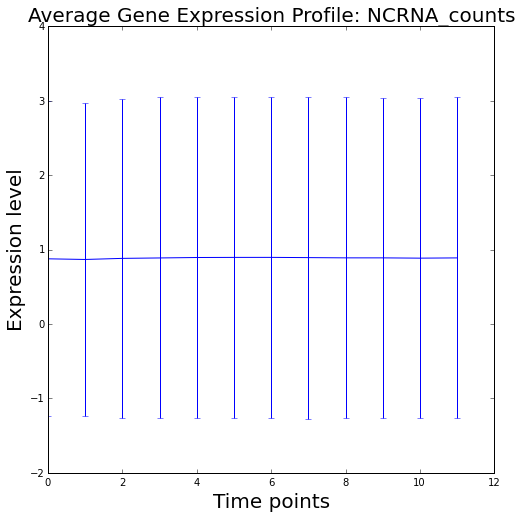

Standard deviations over time points;  t00     1.287447
t05     1.281797
t1_     1.304291
t2_     1.311016
t3_     1.308117
t4_     1.314015
t5_     1.309562
t6_     1.316145
t7_     1.310791
t8_     1.308043
t10_    1.309699
t12_    1.311069
dtype: float64


In [133]:
import matplotlib.pyplot as plt
import scipy.stats as stats
for geneTS, name in zip(geneTSs, names):



    avg = geneTS.mean(axis=0)
    std = geneTS.std(axis=0)
#     print "For name", name
#     print geneTS.shape
#     print geneTS.head()
#     print "Averages over time points: ", avg


    plt.figure(figsize=(8,8))
    plt.errorbar(range(len(keys)), avg, yerr=stats.t.ppf(0.95, [geneTS.shape[0] - 1 for i in range(len(keys))]) * std)
    #plt.xticks(keys)
    plt.xlabel("Time points", fontsize=20)
    plt.ylabel("Expression level", fontsize=20)
    plt.title("Average Gene Expression Profile: " + name, fontsize=20)
    plt.show()
    
    print "Standard deviations over time points; ", std

In [148]:
# Let's plot some typical time profiles

import pandas as pd

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.protein_coding.txt",
            "../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna.txt",
            "../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.txt",
            "../data/GeneExpressionData/featurecounts.genes.counts.selected_reps.ln.surrogate_variables_corrected.ncrna.txt"]
names = ["Protein-Coding_TPM", "NCRNA_TPM", "All_TPM", 'NCRNA_counts']
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
geneTSs = []

for filename in filenames:
    geneTSs.append(pd.read_csv(filename, sep="\t"))
    


In [149]:

num_per_key = []
for key in keys:
        cols = [col for col in list(geneTS.columns.values) if col[:len(key)] == key]
        num_per_key.append(len(cols))
        print cols
        for geneTS in geneTSs:
            geneTS[key] = sum([geneTS[col] for col in cols]) * 1.0 / len(cols)
            std = np.std([geneTS[col] for col in cols], axis=0)
            geneTS[key + 'std'] = std

num_per_key = np.array(num_per_key)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']


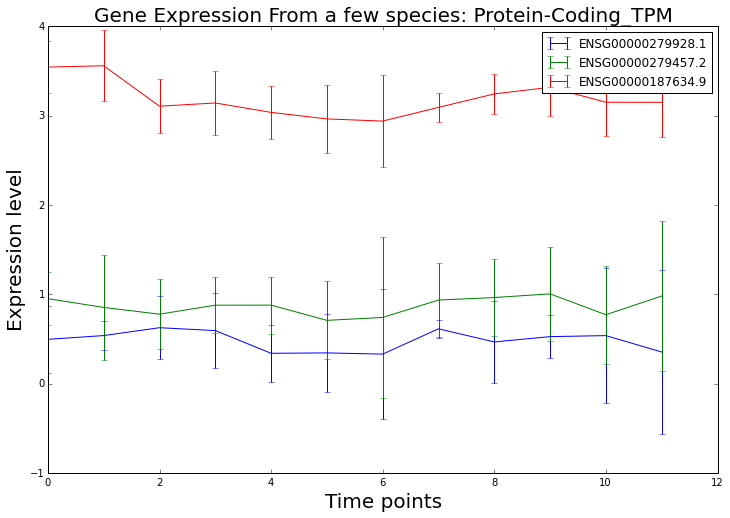

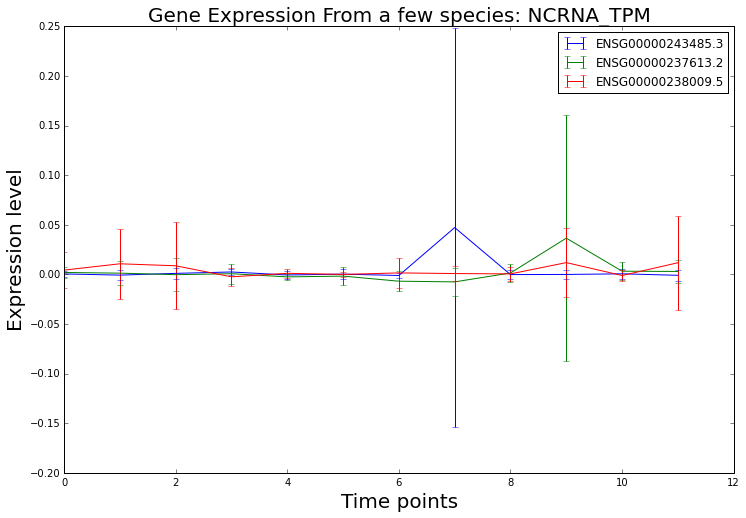

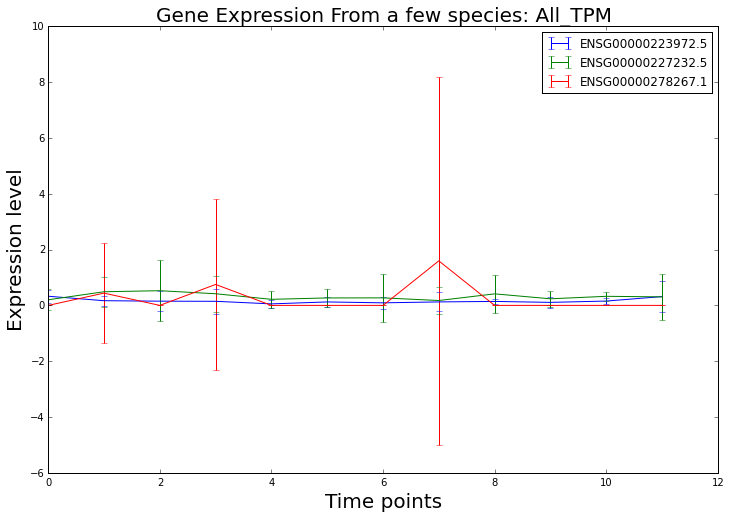

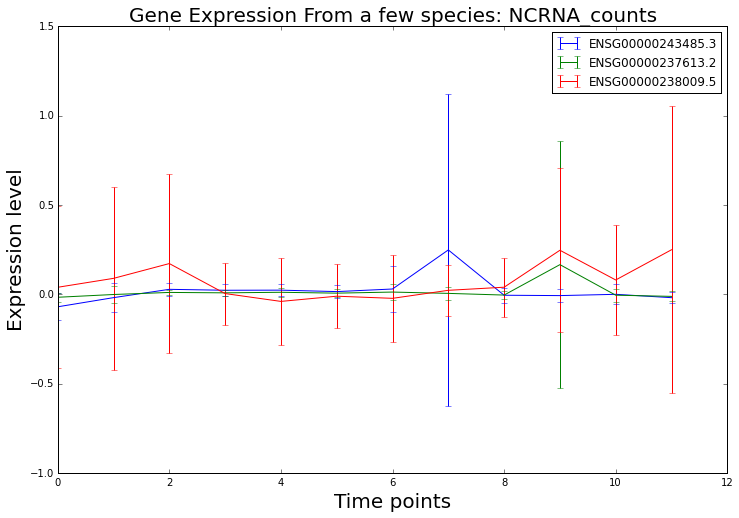

In [150]:
for geneTS, name in zip(geneTSs, names):
    genes = geneTS['gene'][0:3]

    plt.figure(figsize=(12,8))
    for gene in genes:
        # time points, average for the index, std for index
        gene_avg = geneTS[geneTS['gene'] == gene][keys].values.flatten()
        gene_std = geneTS[geneTS['gene'] == gene][[key + 'std' for key in keys]].values.flatten()

        plt.errorbar(range(len(keys)), gene_avg,
                     yerr=stats.t.ppf(0.95, num_per_key - 1) * gene_std, label=gene)

    plt.xlabel("Time points", fontsize=20)
    plt.ylabel("Expression level", fontsize=20)
    plt.title("Gene Expression From a few species: " + name, fontsize=20)
    plt.legend()
plt.show()

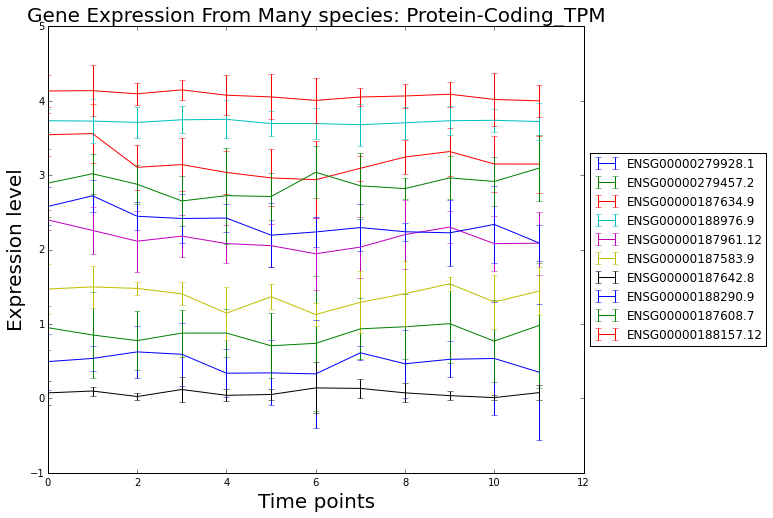

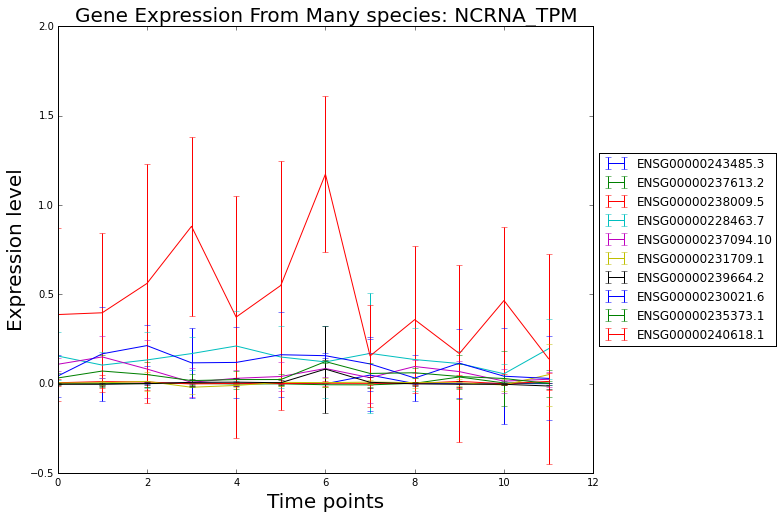

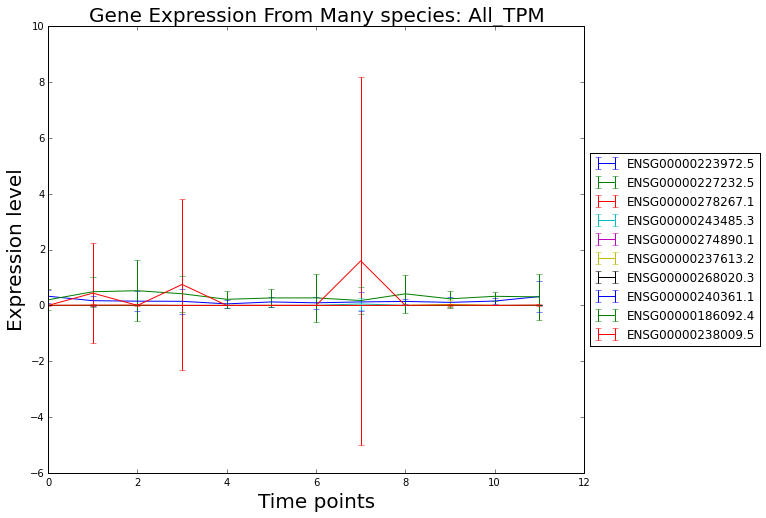

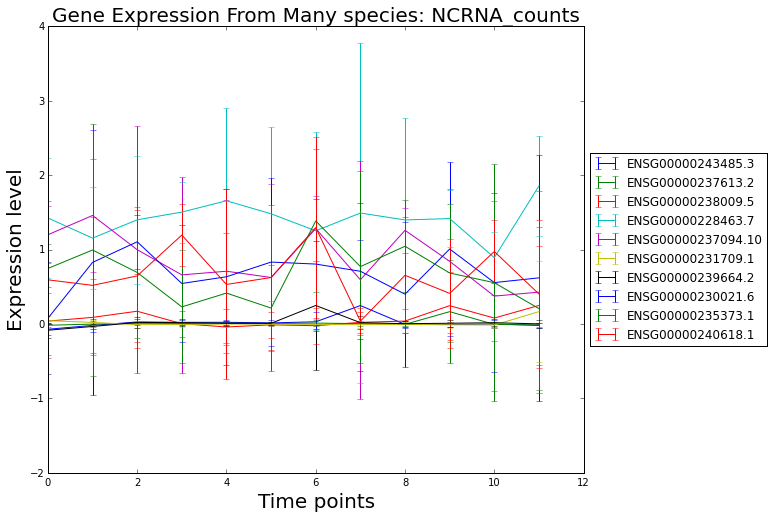

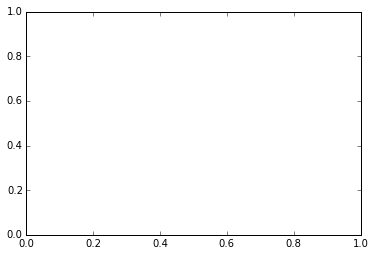

In [151]:
for geneTS, name in zip(geneTSs, names):
    genes = geneTS['gene'][0:10]
    plt.figure(figsize=(12,8))
    ax = plt.subplot(111)
    for gene in genes:
        # time points, average for the index, std for index
        gene_avg = geneTS[geneTS['gene'] == gene][keys].values.flatten()
        gene_std = geneTS[geneTS['gene'] == gene][[key + 'std' for key in keys]].values.flatten()

        plt.errorbar(range(len(keys)), gene_avg,
                     yerr=stats.t.ppf(0.95, num_per_key - 1) * gene_std, label=gene)
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlabel("Time points", fontsize=20)
    plt.ylabel("Expression level", fontsize=20)
    plt.title("Gene Expression From Many species: "+ name, fontsize=20)
    plt.show()
plt.legend()